In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Kaggle Link

Part I : EDA - Exploratory Data Analysis & Pre-processing
The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

Data Import: Import the dataset into a statistical software tool such as Python or R.
Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/manpreet/Documents/pythonproject/ml-project-unsupervised-learning-main/Wholesale_Data.csv")

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# Generate summary statistics
summary_stats = data.describe()
summary_stats


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


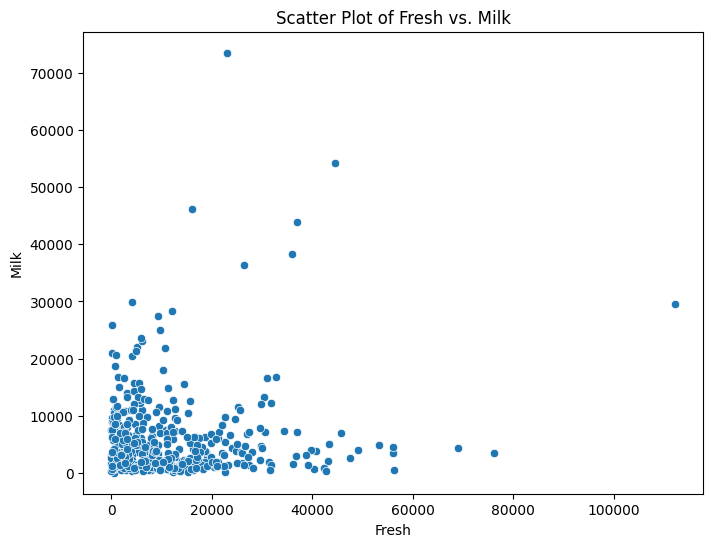

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Fresh", y="Milk", data=data)
plt.title("Scatter Plot of Fresh vs. Milk")
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.show()


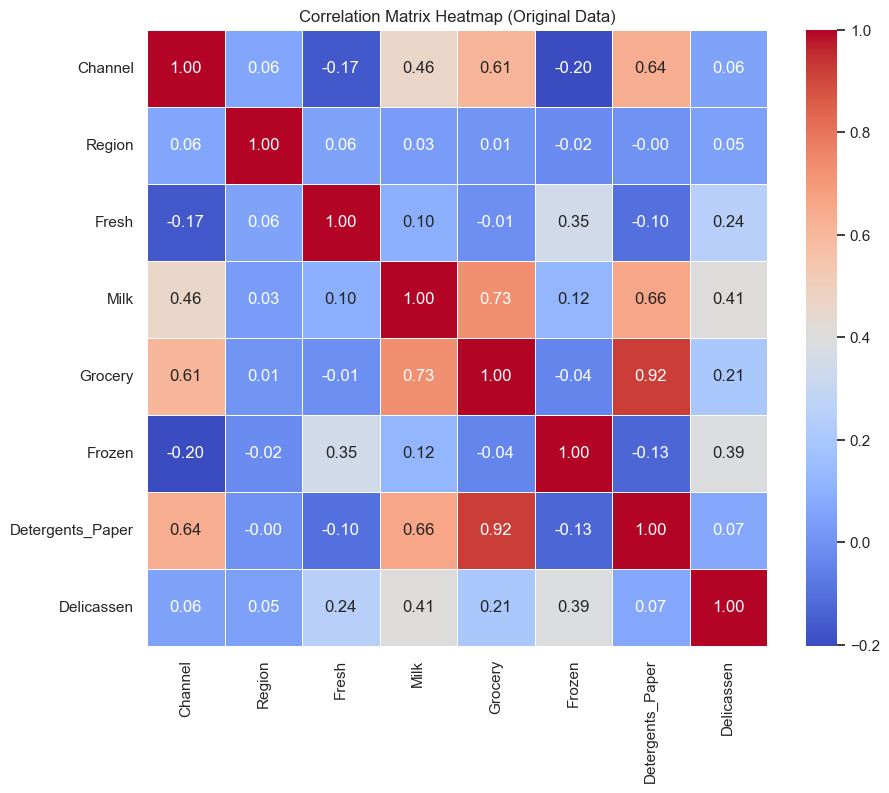

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Original Data)")
plt.show()


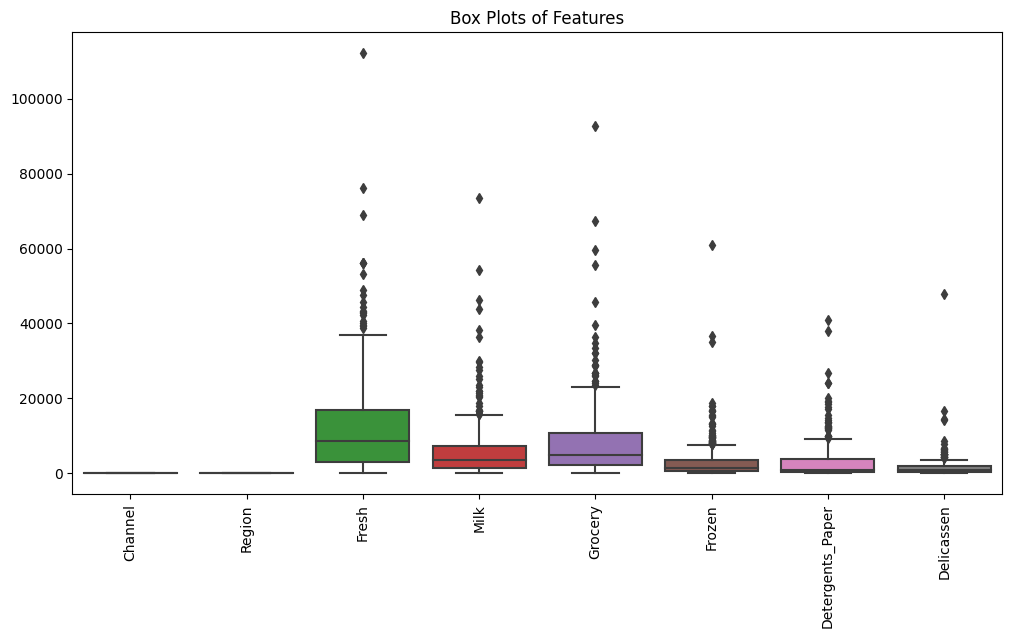

In [7]:
#outlier detection using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="v")
plt.xticks(rotation=90)
plt.title("Box Plots of Features")
plt.show()


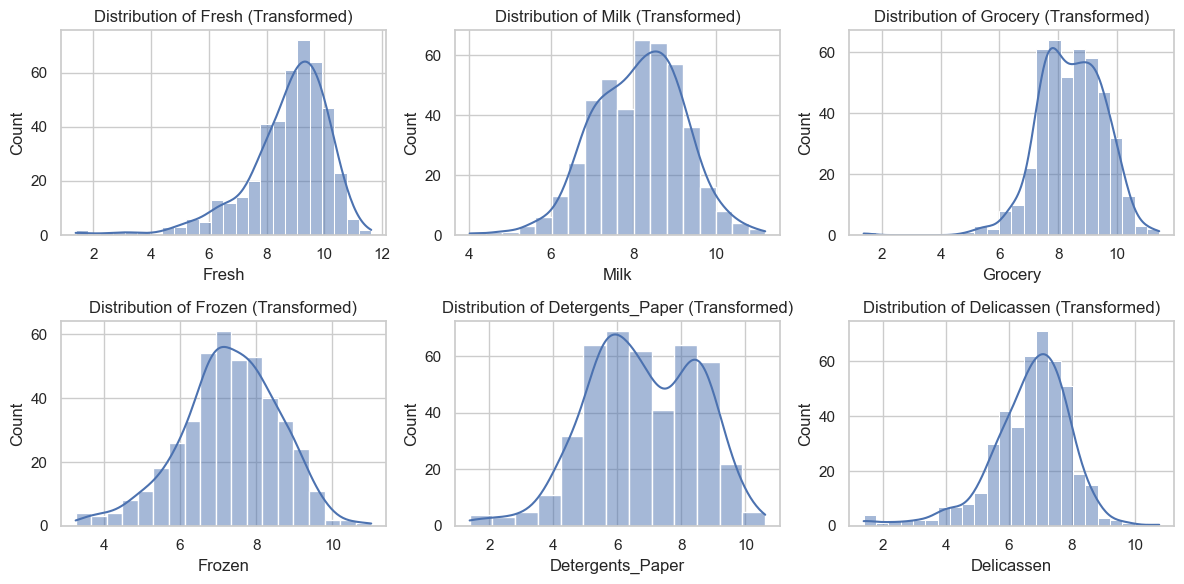

In [10]:
import numpy as np

# Apply log transformation to numerical columns (excluding categorical columns)
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_transformed = data.copy() 

# Apply log transformation to each numerical column
for col in numerical_columns:
    data_transformed[col] = np.log(data_transformed[col] + 1)  # Adding 1 to avoid log(0)

# Check the distribution after log transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_transformed[col], kde=True)
    plt.title(f'Distribution of {col} (Transformed)')
plt.tight_layout()
plt.show()


Part II - KMeans Clustering
The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

/Users/manpreet/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manpreet/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manpreet/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manpreet/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

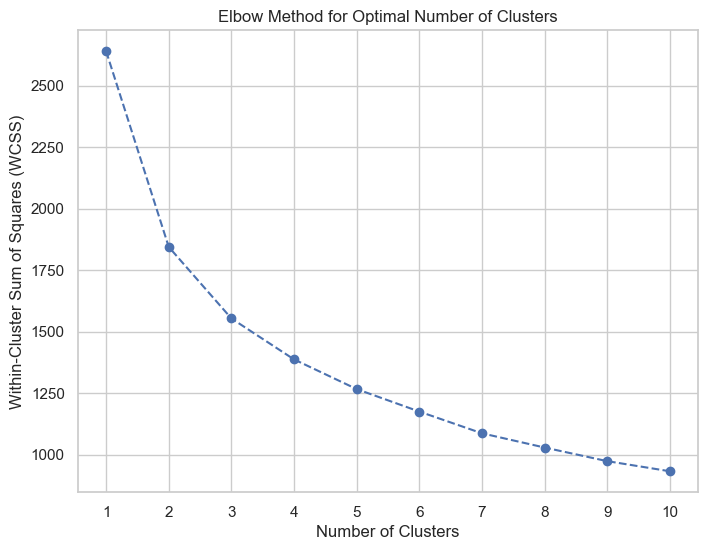

Silhouette Score: 0.2594156555974146


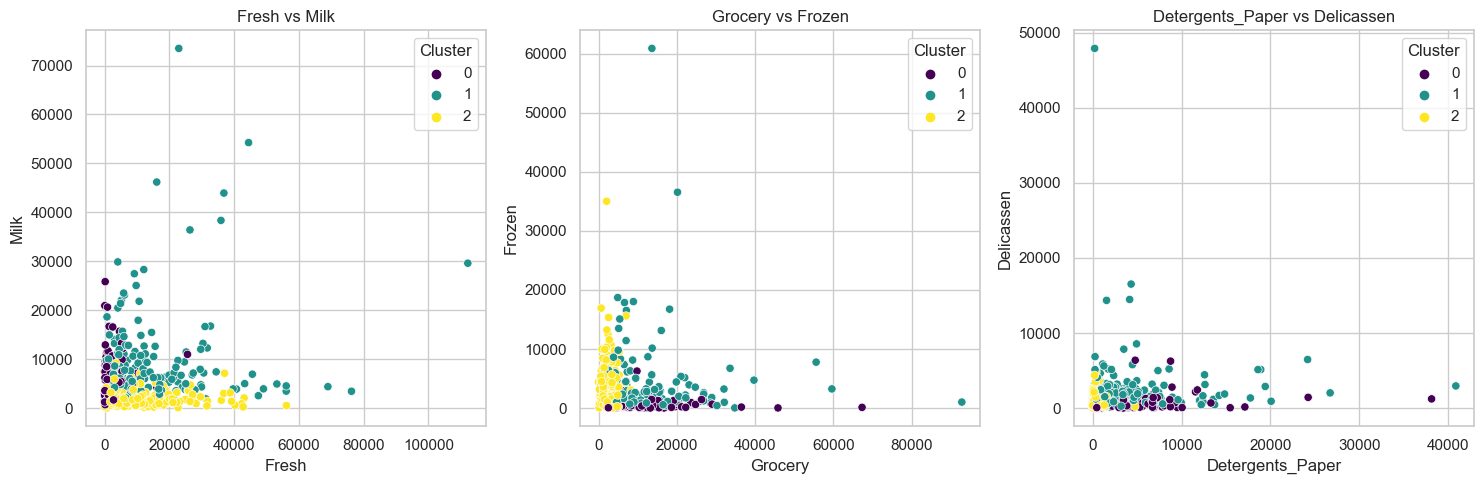

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select the features for clustering 
features = data_transformed[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.show()

# Based on the Elbow method, select the optimal number of clusters 
optimal_num_clusters = 3

# Initialize the K-means model with the optimal number of clusters and set n_init explicitly
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', n_init=10, random_state=42)

# Fit the K-means model to the scaled features
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Evaluate the quality of the clustering using the Silhouette score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Create subplots to visualize the clusters
plt.figure(figsize=(15, 5))

# Create scatter plots for each pair of features
feature_pairs = [('Fresh', 'Milk'), ('Grocery', 'Frozen'), ('Detergents_Paper', 'Delicassen')]

for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=data, x=feature1, y=feature2, hue='Cluster', palette='viridis', legend='full')
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()


Part III - Hierarchical Clustering
Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

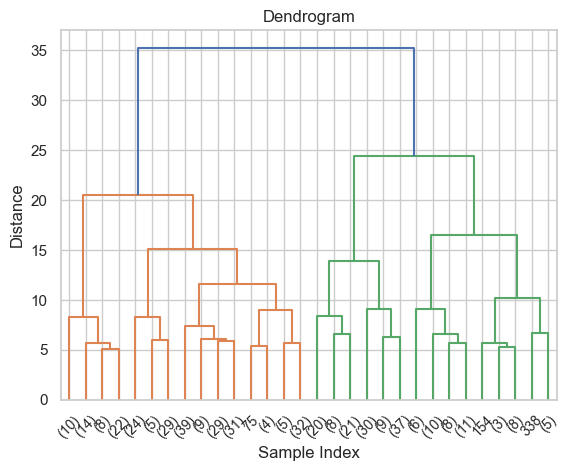

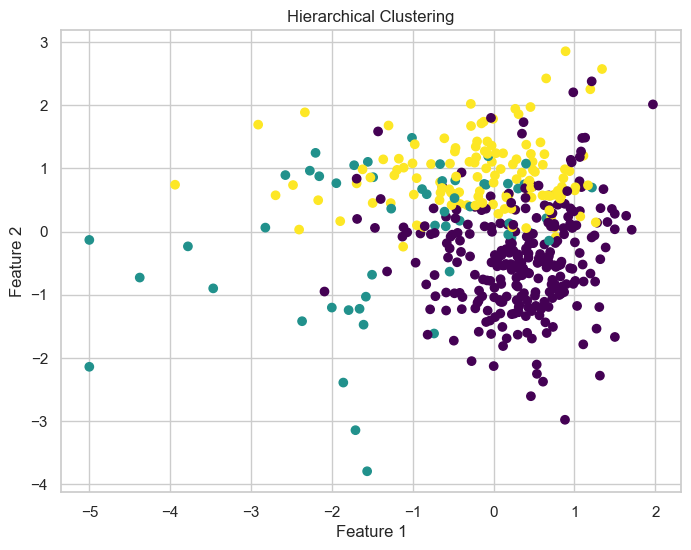

/var/folders/6b/5qqt_7ks3t53y05grmy5wp0w0000gn/T/ipykernel_85101/52956616.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', cmap='viridis')


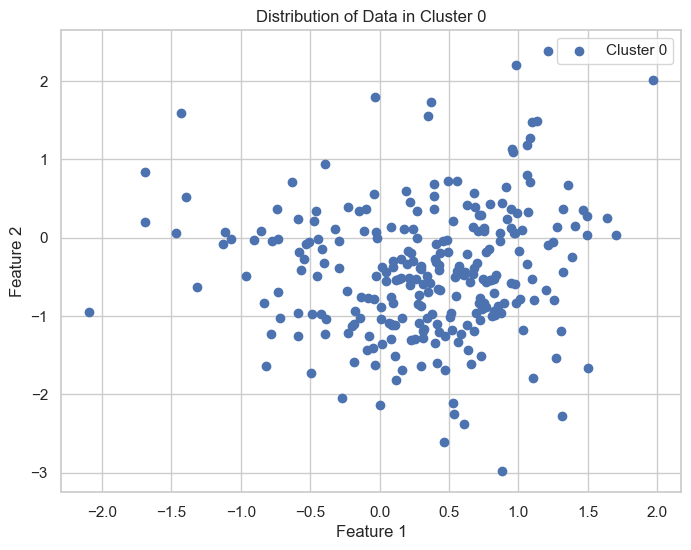

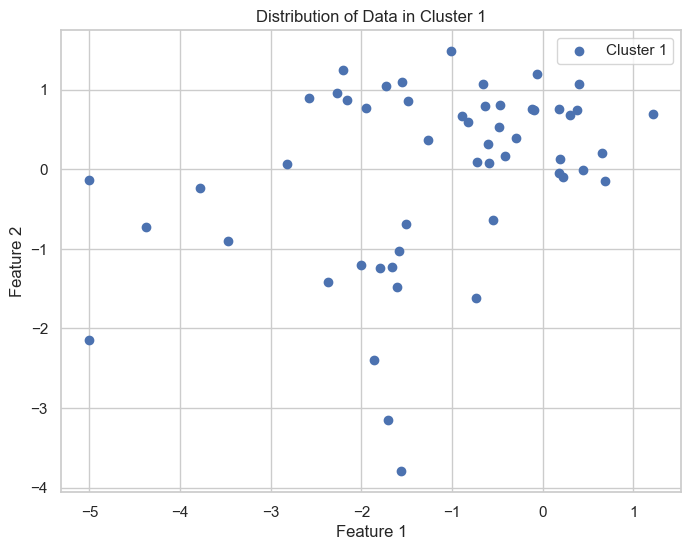

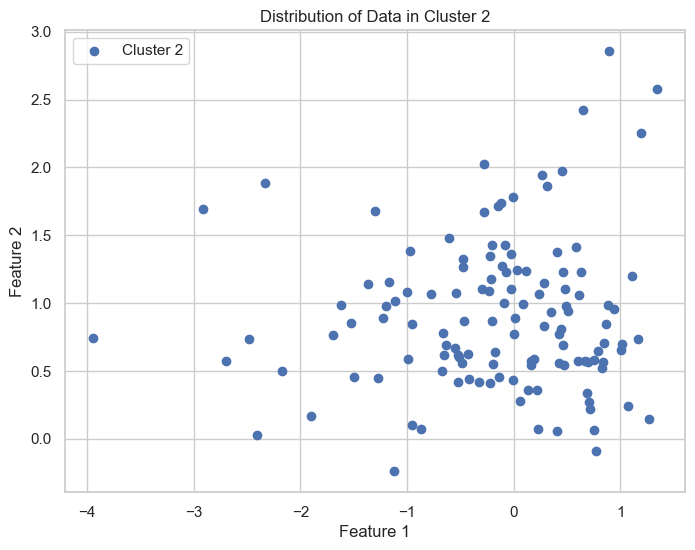

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering

# Select the features for clustering 
features = data_transformed[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a dendrogram to help find the optimal number of clusters
dendrogram_ = dendrogram(ward(scaled_features), truncate_mode='lastp', p=30)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Determine the optimal number of clusters from the dendrogram 
# Based on the dendrogram, choose an appropriate number of clusters
optimal_num_clusters = 3  

# Perform agglomerative clustering with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters)
cluster_labels = agg_clustering.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualize the clusters 
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Visualize the distribution of data points in each cluster
for cluster in range(optimal_num_clusters):
    plt.figure(figsize=(8, 6))
    cluster_data = scaled_features[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', cmap='viridis')
    plt.title(f'Distribution of Data in Cluster {cluster}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Part IV - PCA
In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

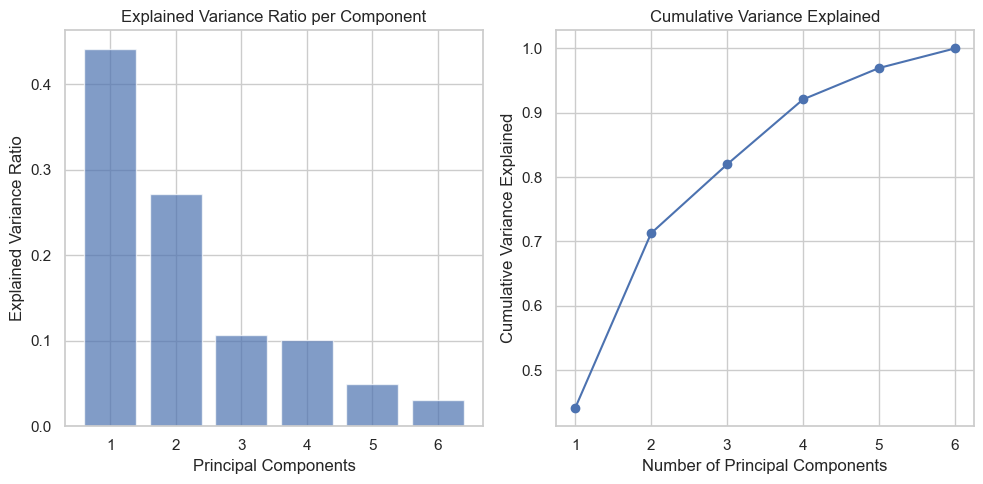

Number of components retained: 5
Loadings (Component Weights):
                       PC1       PC2       PC3       PC4       PC5
Fresh             0.171356 -0.754970 -0.512995 -0.373055 -0.021843
Milk             -0.882962 -0.169971 -0.059064  0.048147  0.411529
Grocery          -0.930409  0.007354 -0.106946  0.075241 -0.050309
Frozen            0.224530 -0.754227 -0.016986  0.617367 -0.039635
Detergents_Paper -0.896497  0.090569 -0.160044  0.064558 -0.335968
Delicassen       -0.349176 -0.677810  0.582559 -0.274078 -0.080202

Feature Importance:
                       PC1       PC2       PC3       PC4       PC5
Fresh             0.105250 -0.590359 -0.639563 -0.478600 -0.040337
Milk             -0.542329 -0.132911 -0.073636  0.061769  0.759954
Grocery          -0.571472  0.005751 -0.133333  0.096528 -0.092903
Frozen            0.137910 -0.589778 -0.021176  0.792031 -0.073193
Detergents_Paper -0.550642  0.070822 -0.199531  0.082823 -0.620419
Delicassen       -0.214469 -0.530022  0.72629

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting relevant columns for PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data_transformed[features]

# Standardize the feature matrix
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_std)

# Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_

# Cumulative Variance ratio
cumulative_var_ratio = explained_var_ratio.cumsum()

# Scree Plot for Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Component')

# Scree Plot for Cumulative Variance Explained
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

# Determine the number of principal components needed to retain at least 95% of the total variance in the dataset. 
n_components = (cumulative_var_ratio <= 0.95).sum() + 1
print("Number of components retained:", n_components)

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# to understand the underlying structure of data
# Interpretation of components 
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the loadings
print("Loadings (Component Weights):")
print(loadings_df)

# Interpretation of components (feature importance)
feature_importance = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance)


Part V - Conclusion
From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. From the EDA, we found there were many outliers in the dataset, although there were no missing values. Outliers were handled through log-transformation.
2. For K means clustering, elbow method was used to determine optimal number of clusters. Out of possible values of 2,3 and 4, 3 was chosen to be the number of clusters. From the scatter plots, it can be seen that clusters are not well separated.
3. For Hierarchical clustering, dendogram was used to find optimal number of clusters and the number of clusters was chosen to be 3. After visualising the clusters, it can be seen that in this case also clusters were not well separated.
4. Principal component analysis was done to understand underlying structure of data and reduce dimensions. It was found that 5 principal components could explain 95% of variance of dataset. Therefore, we can drop the sixth principal component and proceed with dimensionally reduced dataset for further analysis.
